# TensorFlow 2: How to use AutoEncoder for Interpolation

## A Short Tutorial on using TensorFlow 2 with AutoEncoder for Interpolation and Denoising

In [5]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv("../data/lead_dist_sample.csv")
time = df['Time'].values
message = df['Message'].values
df

,Time,Message
0,0.000000,0.000000
1,0.009120,0.012658
2,0.018176,0.012658
3,0.027272,0.012658
4,0.036377,0.025316
...,...,...
106,0.963658,0.949367
107,0.972722,0.962025
108,0.981842,0.974684
109,0.990910,0.987342


# Training

In [9]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")
model.summary()
# Training
model.fit( time, message, epochs=1000, verbose=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               256       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

Epoch 64/1000
4/4 [==============================] - ETA: 0s - loss: 1.3883e-0 - 0s 2ms/step - loss: 1.6458e-05
Epoch 65/1000
4/4 [==============================] - ETA: 0s - loss: 1.9922e-0 - 0s 2ms/step - loss: 1.9555e-05
Epoch 66/1000
4/4 [==============================] - ETA: 0s - loss: 1.2278e-0 - 0s 2ms/step - loss: 1.7282e-05
Epoch 67/1000
4/4 [==============================] - ETA: 0s - loss: 1.3231e-0 - 0s 1ms/step - loss: 1.6303e-05
Epoch 68/1000
4/4 [==============================] - ETA: 0s - loss: 1.8281e-0 - 0s 2ms/step - loss: 1.8444e-05
Epoch 69/1000
4/4 [==============================] - ETA: 0s - loss: 2.0229e-0 - 0s 1ms/step - loss: 1.6915e-05
Epoch 70/1000
4/4 [==============================] - ETA: 0s - loss: 1.7222e-0 - 0s 1ms/step - loss: 1.6522e-05
Epoch 71/1000
4/4 [==============================] - ETA: 0s - loss: 1.6839e-0 - 0s 1ms/step - loss: 1.9544e-05
Epoch 72/1000
4/4 [==============================] - ETA: 0s - loss: 1.5309e-0 - 0s 2ms/step - loss: 2.3

Epoch 137/1000
4/4 [==============================] - ETA: 0s - loss: 1.4732e-0 - 0s 1ms/step - loss: 1.4024e-05
Epoch 138/1000
4/4 [==============================] - ETA: 0s - loss: 1.2823e-0 - 0s 1ms/step - loss: 1.4140e-05
Epoch 139/1000
4/4 [==============================] - ETA: 0s - loss: 1.3475e-0 - 0s 1ms/step - loss: 1.8245e-05
Epoch 140/1000
4/4 [==============================] - ETA: 0s - loss: 1.2327e-0 - 0s 1ms/step - loss: 1.6050e-05
Epoch 141/1000
4/4 [==============================] - ETA: 0s - loss: 1.3570e-0 - 0s 1ms/step - loss: 1.4848e-05
Epoch 142/1000
4/4 [==============================] - ETA: 0s - loss: 8.4730e-0 - 0s 1ms/step - loss: 1.3806e-05
Epoch 143/1000
4/4 [==============================] - ETA: 0s - loss: 2.1859e-0 - 0s 1ms/step - loss: 1.6516e-05
Epoch 144/1000
4/4 [==============================] - ETA: 0s - loss: 1.2135e-0 - 0s 1ms/step - loss: 1.3338e-05
Epoch 145/1000
4/4 [==============================] - ETA: 0s - loss: 1.5276e-0 - 0s 1ms/step - 

4/4 [==============================] - ETA: 0s - loss: 1.8813e-0 - 0s 1ms/step - loss: 1.6705e-05
Epoch 210/1000
4/4 [==============================] - ETA: 0s - loss: 1.5981e-0 - 0s 1ms/step - loss: 1.4167e-05
Epoch 211/1000
4/4 [==============================] - ETA: 0s - loss: 9.6267e-0 - 0s 1ms/step - loss: 1.5301e-05
Epoch 212/1000
4/4 [==============================] - ETA: 0s - loss: 1.8716e-0 - 0s 1ms/step - loss: 1.8261e-05
Epoch 213/1000
4/4 [==============================] - ETA: 0s - loss: 1.7450e-0 - 0s 1ms/step - loss: 1.6062e-05
Epoch 214/1000
4/4 [==============================] - ETA: 0s - loss: 1.2432e-0 - 0s 1ms/step - loss: 1.8039e-05
Epoch 215/1000
4/4 [==============================] - ETA: 0s - loss: 1.7114e-0 - 0s 1ms/step - loss: 1.5630e-05
Epoch 216/1000
4/4 [==============================] - ETA: 0s - loss: 1.3215e-0 - 0s 1ms/step - loss: 1.8722e-05
Epoch 217/1000
4/4 [==============================] - ETA: 0s - loss: 5.2910e-0 - 0s 2ms/step - loss: 3.3444e-0

4/4 [==============================] - ETA: 0s - loss: 1.3038e-0 - 0s 1ms/step - loss: 1.3513e-05
Epoch 282/1000
4/4 [==============================] - ETA: 0s - loss: 1.9399e-0 - 0s 1ms/step - loss: 1.4353e-05
Epoch 283/1000
4/4 [==============================] - ETA: 0s - loss: 1.4909e-0 - 0s 1ms/step - loss: 1.4368e-05
Epoch 284/1000
4/4 [==============================] - ETA: 0s - loss: 1.2429e-0 - 0s 1ms/step - loss: 1.4415e-05
Epoch 285/1000
4/4 [==============================] - ETA: 0s - loss: 1.3448e-0 - 0s 1ms/step - loss: 1.3907e-05
Epoch 286/1000
4/4 [==============================] - ETA: 0s - loss: 1.8645e-0 - 0s 1ms/step - loss: 1.7484e-05
Epoch 287/1000
4/4 [==============================] - ETA: 0s - loss: 1.1557e-0 - 0s 1ms/step - loss: 1.4626e-05
Epoch 288/1000
4/4 [==============================] - ETA: 0s - loss: 1.5209e-0 - 0s 1ms/step - loss: 1.4899e-05
Epoch 289/1000
4/4 [==============================] - ETA: 0s - loss: 1.4032e-0 - 0s 1ms/step - loss: 1.4022e-0

4/4 [==============================] - ETA: 0s - loss: 3.0455e-0 - 0s 1ms/step - loss: 3.0054e-05
Epoch 354/1000
4/4 [==============================] - ETA: 0s - loss: 1.6705e-0 - 0s 1ms/step - loss: 2.1982e-05
Epoch 355/1000
4/4 [==============================] - ETA: 0s - loss: 3.4711e-0 - 0s 1ms/step - loss: 3.8189e-05
Epoch 356/1000
4/4 [==============================] - ETA: 0s - loss: 3.8345e-0 - 0s 1ms/step - loss: 4.6919e-05
Epoch 357/1000
4/4 [==============================] - ETA: 0s - loss: 5.1068e-0 - 0s 1ms/step - loss: 4.7373e-05
Epoch 358/1000
4/4 [==============================] - ETA: 0s - loss: 1.4471e-0 - 0s 1ms/step - loss: 2.5788e-05
Epoch 359/1000
4/4 [==============================] - ETA: 0s - loss: 4.0191e-0 - 0s 1ms/step - loss: 2.5530e-05
Epoch 360/1000
4/4 [==============================] - ETA: 0s - loss: 1.5564e-0 - 0s 1ms/step - loss: 2.5830e-05
Epoch 361/1000
4/4 [==============================] - ETA: 0s - loss: 2.2693e-0 - 0s 1ms/step - loss: 3.1264e-0

Epoch 425/1000
4/4 [==============================] - ETA: 0s - loss: 2.2756e-0 - 0s 1ms/step - loss: 2.6523e-05
Epoch 426/1000
4/4 [==============================] - ETA: 0s - loss: 1.1204e-0 - 0s 2ms/step - loss: 1.4413e-05
Epoch 427/1000
4/4 [==============================] - ETA: 0s - loss: 1.3614e-0 - 0s 1ms/step - loss: 1.4421e-05
Epoch 428/1000
4/4 [==============================] - ETA: 0s - loss: 1.7403e-0 - 0s 1ms/step - loss: 1.5832e-05
Epoch 429/1000
4/4 [==============================] - ETA: 0s - loss: 1.2439e-0 - 0s 1ms/step - loss: 1.1911e-05
Epoch 430/1000
4/4 [==============================] - ETA: 0s - loss: 2.3810e-0 - 0s 1ms/step - loss: 2.0730e-05
Epoch 431/1000
4/4 [==============================] - ETA: 0s - loss: 1.1964e-0 - 0s 2ms/step - loss: 1.3032e-05
Epoch 432/1000
4/4 [==============================] - ETA: 0s - loss: 1.0202e-0 - 0s 2ms/step - loss: 1.6341e-05
Epoch 433/1000
4/4 [==============================] - ETA: 0s - loss: 1.2177e-0 - 0s 1ms/step - 

4/4 [==============================] - ETA: 0s - loss: 3.1015e-0 - 0s 1ms/step - loss: 3.9572e-05
Epoch 498/1000
4/4 [==============================] - ETA: 0s - loss: 6.2466e-0 - 0s 1ms/step - loss: 4.2433e-05
Epoch 499/1000
4/4 [==============================] - ETA: 0s - loss: 3.2971e-0 - 0s 2ms/step - loss: 3.8233e-05
Epoch 500/1000
4/4 [==============================] - ETA: 0s - loss: 1.8973e-0 - 0s 1ms/step - loss: 3.2333e-05
Epoch 501/1000
4/4 [==============================] - ETA: 0s - loss: 2.9076e-0 - 0s 1ms/step - loss: 3.3236e-05
Epoch 502/1000
4/4 [==============================] - ETA: 0s - loss: 1.9517e-0 - 0s 1ms/step - loss: 1.8025e-05
Epoch 503/1000
4/4 [==============================] - ETA: 0s - loss: 1.9581e-0 - 0s 1ms/step - loss: 1.8045e-05
Epoch 504/1000
4/4 [==============================] - ETA: 0s - loss: 1.2286e-0 - 0s 1ms/step - loss: 1.6509e-05
Epoch 505/1000
4/4 [==============================] - ETA: 0s - loss: 1.9191e-0 - 0s 1ms/step - loss: 1.4678e-0

4/4 [==============================] - ETA: 0s - loss: 1.3117e-0 - 0s 1ms/step - loss: 2.0521e-05
Epoch 570/1000
4/4 [==============================] - ETA: 0s - loss: 3.4086e-0 - 0s 1ms/step - loss: 2.3745e-05
Epoch 571/1000
4/4 [==============================] - ETA: 0s - loss: 1.4502e-0 - 0s 1ms/step - loss: 1.5516e-05
Epoch 572/1000
4/4 [==============================] - ETA: 0s - loss: 1.9249e-0 - 0s 1ms/step - loss: 2.4335e-05
Epoch 573/1000
4/4 [==============================] - ETA: 0s - loss: 1.5761e-0 - 0s 1ms/step - loss: 2.0018e-05
Epoch 574/1000
4/4 [==============================] - ETA: 0s - loss: 1.4594e-0 - 0s 1ms/step - loss: 2.1845e-05
Epoch 575/1000
4/4 [==============================] - ETA: 0s - loss: 1.8107e-0 - 0s 1ms/step - loss: 1.8167e-05
Epoch 576/1000
4/4 [==============================] - ETA: 0s - loss: 1.9368e-0 - 0s 1ms/step - loss: 2.0259e-05
Epoch 577/1000
4/4 [==============================] - ETA: 0s - loss: 9.9489e-0 - 0s 1ms/step - loss: 1.8494e-0

4/4 [==============================] - ETA: 0s - loss: 1.2912e-0 - 0s 1ms/step - loss: 2.2103e-05
Epoch 642/1000
4/4 [==============================] - ETA: 0s - loss: 1.5207e-0 - 0s 938us/step - loss: 2.5013e-05
Epoch 643/1000
4/4 [==============================] - ETA: 0s - loss: 1.9576e-0 - 0s 1ms/step - loss: 2.6475e-05
Epoch 644/1000
4/4 [==============================] - ETA: 0s - loss: 1.3169e-0 - 0s 1ms/step - loss: 1.7876e-05
Epoch 645/1000
4/4 [==============================] - ETA: 0s - loss: 1.2787e-0 - 0s 1ms/step - loss: 1.5232e-05
Epoch 646/1000
4/4 [==============================] - ETA: 0s - loss: 1.0739e-0 - 0s 2ms/step - loss: 1.4611e-05
Epoch 647/1000
4/4 [==============================] - ETA: 0s - loss: 1.9194e-0 - 0s 1ms/step - loss: 1.7068e-05
Epoch 648/1000
4/4 [==============================] - ETA: 0s - loss: 1.8190e-0 - 0s 1ms/step - loss: 1.8813e-05
Epoch 649/1000
4/4 [==============================] - ETA: 0s - loss: 3.4713e-0 - 0s 2ms/step - loss: 2.8785e

4/4 [==============================] - ETA: 0s - loss: 2.7308e-0 - 0s 984us/step - loss: 1.0585e-04
Epoch 714/1000
4/4 [==============================] - ETA: 0s - loss: 4.5073e-0 - 0s 908us/step - loss: 8.0450e-05
Epoch 715/1000
4/4 [==============================] - ETA: 0s - loss: 4.6477e-0 - 0s 877us/step - loss: 6.8096e-05
Epoch 716/1000
4/4 [==============================] - ETA: 0s - loss: 2.0037e-0 - 0s 1ms/step - loss: 1.0787e-04
Epoch 717/1000
4/4 [==============================] - ETA: 0s - loss: 6.9754e-0 - 0s 1ms/step - loss: 4.3012e-05
Epoch 718/1000
4/4 [==============================] - ETA: 0s - loss: 2.2055e-0 - 0s 1ms/step - loss: 2.7047e-05
Epoch 719/1000
4/4 [==============================] - ETA: 0s - loss: 1.6585e-0 - 0s 1ms/step - loss: 2.8398e-05
Epoch 720/1000
4/4 [==============================] - ETA: 0s - loss: 2.2827e-0 - 0s 952us/step - loss: 2.2222e-05
Epoch 721/1000
4/4 [==============================] - ETA: 0s - loss: 1.9229e-0 - 0s 1ms/step - loss: 1

4/4 [==============================] - ETA: 0s - loss: 1.0035e-0 - 0s 2ms/step - loss: 6.9933e-05
Epoch 786/1000
4/4 [==============================] - ETA: 0s - loss: 8.7948e-0 - 0s 1ms/step - loss: 8.9235e-05
Epoch 787/1000
4/4 [==============================] - ETA: 0s - loss: 4.4967e-0 - 0s 1ms/step - loss: 6.4000e-05
Epoch 788/1000
4/4 [==============================] - ETA: 0s - loss: 1.5712e-0 - 0s 1ms/step - loss: 4.2797e-05
Epoch 789/1000
4/4 [==============================] - ETA: 0s - loss: 3.0224e-0 - 0s 1ms/step - loss: 3.0163e-05
Epoch 790/1000
4/4 [==============================] - ETA: 0s - loss: 2.5500e-0 - 0s 951us/step - loss: 2.0521e-05
Epoch 791/1000
4/4 [==============================] - ETA: 0s - loss: 2.4108e-0 - 0s 1ms/step - loss: 2.6685e-05
Epoch 792/1000
4/4 [==============================] - ETA: 0s - loss: 5.8296e-0 - 0s 1ms/step - loss: 3.6157e-05
Epoch 793/1000
4/4 [==============================] - ETA: 0s - loss: 1.4450e-0 - 0s 1ms/step - loss: 3.2304e

4/4 [==============================] - ETA: 0s - loss: 2.6134e-0 - 0s 982us/step - loss: 2.3268e-05
Epoch 858/1000
4/4 [==============================] - ETA: 0s - loss: 1.0428e-0 - 0s 875us/step - loss: 1.6147e-05
Epoch 859/1000
4/4 [==============================] - ETA: 0s - loss: 1.9600e-0 - 0s 966us/step - loss: 2.3261e-05
Epoch 860/1000
4/4 [==============================] - ETA: 0s - loss: 1.0016e-0 - 0s 913us/step - loss: 2.3364e-05
Epoch 861/1000
4/4 [==============================] - ETA: 0s - loss: 1.4246e-0 - 0s 1ms/step - loss: 1.2167e-05
Epoch 862/1000
4/4 [==============================] - ETA: 0s - loss: 1.9858e-0 - 0s 1ms/step - loss: 1.5220e-05
Epoch 863/1000
4/4 [==============================] - ETA: 0s - loss: 1.0618e-0 - 0s 1ms/step - loss: 1.3033e-05
Epoch 864/1000
4/4 [==============================] - ETA: 0s - loss: 2.1077e-0 - 0s 1ms/step - loss: 1.7818e-05
Epoch 865/1000
4/4 [==============================] - ETA: 0s - loss: 1.1201e-0 - 0s 1ms/step - loss: 1

4/4 [==============================] - ETA: 0s - loss: 3.1390e-0 - 0s 1ms/step - loss: 2.7883e-05
Epoch 930/1000
4/4 [==============================] - ETA: 0s - loss: 3.4979e-0 - 0s 1ms/step - loss: 2.3660e-05
Epoch 931/1000
4/4 [==============================] - ETA: 0s - loss: 3.7098e-0 - 0s 945us/step - loss: 2.3112e-05
Epoch 932/1000
4/4 [==============================] - ETA: 0s - loss: 3.6157e-0 - 0s 1ms/step - loss: 2.5103e-05
Epoch 933/1000
4/4 [==============================] - ETA: 0s - loss: 1.6377e-0 - 0s 1ms/step - loss: 1.7798e-05
Epoch 934/1000
4/4 [==============================] - ETA: 0s - loss: 1.0740e-0 - 0s 1ms/step - loss: 1.8980e-05
Epoch 935/1000
4/4 [==============================] - ETA: 0s - loss: 2.1622e-0 - 0s 1ms/step - loss: 2.4691e-05
Epoch 936/1000
4/4 [==============================] - ETA: 0s - loss: 3.0596e-0 - 0s 1ms/step - loss: 2.0329e-05
Epoch 937/1000
4/4 [==============================] - ETA: 0s - loss: 1.6221e-0 - 0s 1ms/step - loss: 1.3336e

# Prediction

In [13]:
newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)
newtimepoints = newtimepoints_scaled*(1594247110.290019 - 1594247088.289515) + 1594247088.289515
y_predicted = y_predicted_scaled*(112 - 33) + 33

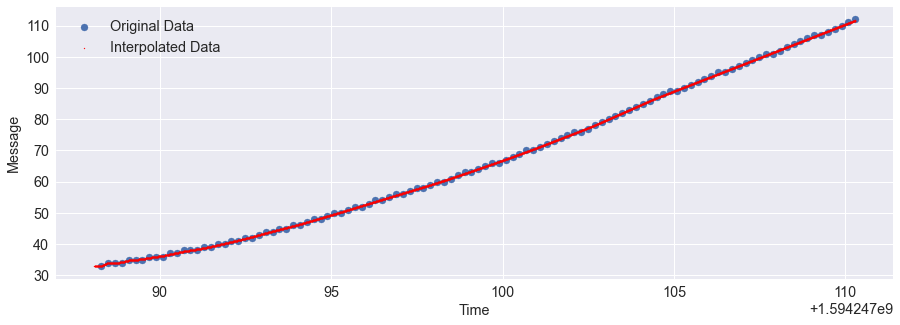

In [21]:
# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(1594247110.290019 - 1594247088.289515) + 1594247088.289515, message*(112 - 33) + 33, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Message')
plt.legend()
plt.show()

# Differentiation

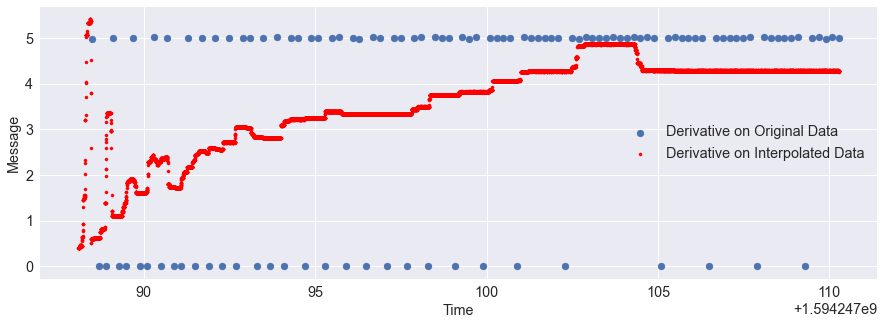

In [31]:
df_interpolation = pd.DataFrame()
df_interpolation['Time'] = newtimepoints
df_interpolation['Message'] = y_predicted
df_interpolation['diff'] = df_interpolation['Message'].diff()/df_interpolation['Time'].diff()

df_original = pd.DataFrame()
df_original['Time'] = time*(1594247110.290019 - 1594247088.289515) + 1594247088.289515
df_original['Message']  = message*(112 - 33) + 33
df_original['diff'] = df_original['Message'].diff()/df_original['Time'].diff()

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(df_original['Time'], df_original['diff'], label='Derivative on Original Data')
plt.scatter(df_interpolation['Time'], df_interpolation['diff'], s= 10, c = 'red', label='Derivative on Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Message')
plt.legend()
plt.show()